# Origin's and Destination's bike sharing system stations analysis

This code allows you to estimate the density of bike sharing stations at the origin and the destination.  

## Importing libraries

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib as mpl
import csv
import math

print ("it works")

it works


## Origin's bike station density 

### Example for only one route 

In [2]:
route = 1099
db = gpd.read_file('../Shapes/start_encicla600/R' +"%s" % (route) +'_start_encicla600.shp')
print (db.crs)
db.head()

{'init': 'epsg:3116'}


,Name,x_coor,y_coor,geometry
0,M46,831681.919859,1.181257e+06,POINT Z (831681.9198593919 1181257.093617068 0)


In [3]:
db.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 4 columns):
Name        1 non-null object
x_coor      1 non-null float64
y_coor      1 non-null float64
geometry    1 non-null object
dtypes: float64(2), object(2)
memory usage: 112.0+ bytes


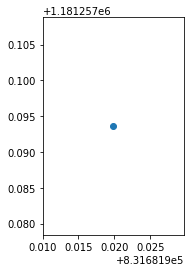

In [4]:
db.plot()

In [5]:
#Number of stations
ns = len(db)
#Buffer radius 
radio = 0.6
area = 3.14159265358979 * radio**2
#Bike station density
nsindex = ns / area
print (ns)
print (area)
print (nsindex)

1
1.1309733552923245
0.8841941282883082


In [6]:
results = pd.DataFrame ({
        "route": [str(route)],
        "nsindex": [nsindex]})
print (results)

  route   nsindex
0  1099  0.884194


### Origin's bike station density for ALL routes 

The code requires the list of the origin points associated to all the routes. This list is located in the Tables folder. If you move this file out of this folder, please modify the code.   

In [36]:
routes = np.loadtxt('../Tables/Routes.txt',dtype='str')
for i in routes:
    db = gpd.read_file('../Shapes/start_encicla600/R' +"%s" % (i) +'_start_encicla600.shp')
    ns = len(db)
    radio = 0.6
    area = 3.14159265358979 * radio**2
    nsindex = ns / area
    results = pd.DataFrame ({
        "route": [str(i)],
        "nsindex": [nsindex]})
    results.to_csv('../Tables/OUT/R' +"%s" %(i)+'_start_encicla600_index.txt',index=False, header=True)

This part of the code summarizes the Origin's bike station density in only one table. Please copy it to a text file and save. 

In [38]:
print 'route,O_nsindex'
for i in routes:
    df=np.loadtxt('../Tables/OUT/R' +"%s" %(i)+'_start_encicla600_index.txt', delimiter=',',skiprows=1)
    print ((str(i)),(df[1]))

ruta,O_nsindex
('10291', 0.88419412828800004)
('10292', 0.88419412828800004)
('1099', 0.88419412828800004)
('1101', 1.76838825658)
('1147', 0.88419412828800004)
('1381', 1.76838825658)
('1398', 4.4209706414400003)
('1401', 2.6525823848600001)
('1408', 0.88419412828800004)
('1409', 3.53677651315)
('1419', 1.76838825658)
('1421', 0.88419412828800004)
('1423', 2.6525823848600001)
('3001', 4.4209706414400003)
('3006', 2.6525823848600001)
('3009', 0.88419412828800004)
('3012', 2.6525823848600001)
('3013', 2.6525823848600001)
('3018', 1.76838825658)
('3024', 0.88419412828800004)
('3028', 3.53677651315)
('3029', 4.4209706414400003)
('3030', 3.53677651315)
('3032', 2.6525823848600001)
('3033', 1.76838825658)
('3034', 1.76838825658)
('3040', 0.88419412828800004)
('3041', 0.88419412828800004)
('3042', 0.88419412828800004)
('3046', 0.88419412828800004)
('4001', 0.88419412828800004)
('4006', 0.88419412828800004)
('4009', 0.88419412828800004)
('4010', 3.53677651315)
('4012', 3.53677651315)
('4017',

## Destination's bike station density 

### Destination's bike station density for ALL routes 

The code requires the list of the destination points associated to all the routes. This list is located in the Tables folder. If you move this file out of this folder, please modify the code.   

In [8]:
routes = np.loadtxt('../Tables/Routes.txt',dtype='str')

In [39]:
for i in routes:
    db = gpd.read_file('../datos/shp/end_encicla600/R' +"%s" % (i) +'_end_encicla600.shp')
    ns = len(db)
    radio = 0.6
    area = 3.14159265358979 * radio**2
    nsindex = ns / area
    results = pd.DataFrame ({
        "ruta": [str(ruta)],
        "nsindex": [nsindex]})
    results.to_csv('../Tables/OUT/R' +"%s" %(i)+'_end_encicla600_index.txt',index=False, header=True)

This part of the code summarizes the Destination's bike station density in only one table. Please copy it to a text file and save. 

In [40]:
print 'ruta,D_nsindex'
for i in routes:
    df=np.loadtxt('../Tables/OUT/R' +"%s" %(i)+'_end_encicla600_index.txt', delimiter=',',skiprows=1)
    print ((str(i)),(df[1]))

ruta,D_nsindex
('1002', 1.76838825658)
('1006', 0.88419412828800004)
('10291', 4.4209706414400003)
('1052', 0.88419412828800004)
('1101', 0.88419412828800004)
('1102', 0.88419412828800004)
('1104', 0.88419412828800004)
('1124', 0.88419412828800004)
('1128', 5.3051647697300002)
('1132', 0.88419412828800004)
('1134', 0.88419412828800004)
('1151', 2.6525823848600001)
('1381', 0.88419412828800004)
('1392', 2.6525823848600001)
('1399', 0.88419412828800004)
('1401', 0.88419412828800004)
('1404', 0.88419412828800004)
('1408', 2.6525823848600001)
('1409', 0.88419412828800004)
('1413', 0.88419412828800004)
('1415', 3.53677651315)
('1419', 0.88419412828800004)
('1423', 0.88419412828800004)
('3002', 1.76838825658)
('3004', 1.76838825658)
('3006', 0.88419412828800004)
('3012', 1.76838825658)
('3013', 2.6525823848600001)
('3015', 2.6525823848600001)
('3016', 2.6525823848600001)
('3018', 1.76838825658)
('3019', 0.88419412828800004)
('3024', 0.88419412828800004)
('3025', 1.76838825658)
('3026', 0.884